#Introduction to Text Analytics using Apache Spark
In this course we shall see some of the main methods that are used for text analytics, and in general natural language processing. For more information of the methods that we will be using please visit the [documentation page](https://spark.apache.org/docs/latest/ml-features).
If you are using Google Colab, the first step we shall do in order to use pyspark, is install it by using the following command:

In [ ]:
!pip install pyspark==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 KB 17.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805917 sha256=3e3f84050d80d0fd7da362e5e1ddd094a65402ca1b0f1ee7e157b58a5fb724e7
  Stored in directory: /root/.cache/pip/wheels/2f/f8/95/2ad14a4614b4a9f645ee928fbbd057b1b254c67adb494c9a58
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.mllib.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline, PipelineModel

spark = SparkSession.builder.appName("Introduction to Text Analytics using Spark").getOrCreate()

# 1. Pre-processing of Data:

Before applying any advanced analytics methods to our data, in order to execute text analytics, we need to pre-process our text. Usually this step is consisted by the methods we shall see below:

## 1.1 Tokenization of Data

In [ ]:
sentenceDataFrame = spark.createDataFrame([
    (0, "Introduction to Text Analytics Using Apache Spark"),
    (1, "DSC511 is a Data Science Course"),
    (2, "Other courses at DSc at the University of Cyprus might be..."),
    (3, "DSC510, DSC530, DSC531,"),
    (3, "DSC532,DSC550,etc..."),
], ["id", "sentence"])

tokenizer = Tokenizer(inputCol="sentence", outputCol="words")

# The udf function provided by PySpark is used to wrap the lambda function, so that it can be used in a Spark DataFrame
countTokens = udf(lambda words: len(words), IntegerType())

tokenized = tokenizer.transform(sentenceDataFrame)
tokenized.select("sentence", "words")\
    .withColumn("tokens", countTokens(col("words"))).show(truncate=False)

+------------------------------------------------------------+------------------------------------------------------------------------+------+
|sentence                                                    |words                                                                   |tokens|
+------------------------------------------------------------+------------------------------------------------------------------------+------+
|Introduction to Text Analytics Using Apache Spark           |[introduction, to, text, analytics, using, apache, spark]               |7     |
|DSC511 is a Data Science Course                             |[dsc511, is, a, data, science, course]                                  |6     |
|Other courses at DSc at the University of Cyprus might be...|[other, courses, at, dsc, at, the, university, of, cyprus, might, be...]|11    |
|DSC510, DSC530, DSC531,                                     |[dsc510,, dsc530,, dsc531,]                                             |3     |

### Equalivent Code of creating a list of words on a PySpark DataFrame Column without using PySpark Tokenizer

In [ ]:
sentenceDataFrame = spark.createDataFrame([
    (0, "%Introduction to Text Analytics Using Apache Spark%"),
    (1, "Big Data Analytics (DSC511) is a Data Science Course!"),
    (2, "Other courses at DSc at the University of Cyprus might be..."),
    (3, "DSC510, DSC530, DSC531,"),
    (3, "DSC532,DSC550,etc..."),
], ["id", "sentence"])

countTokens = udf(lambda words: len(words), IntegerType())

# text cleanup
rawdata_proc = sentenceDataFrame.withColumn("words", split(regexp_replace(lower(sentenceDataFrame.sentence), '[\\s"\']+', ' '), ' '))
# tokenize and filter out empty elements
rawdata_proc = rawdata_proc.withColumn("words", expr("filter (words, elem -> elem != '')"))
# calculate how many tokens we have in each element
rawdata_proc.withColumn("tokens", countTokens(col("words"))).show(truncate=False)

+---+------------------------------------------------------------+------------------------------------------------------------------------+------+
|id |sentence                                                    |words                                                                   |tokens|
+---+------------------------------------------------------------+------------------------------------------------------------------------+------+
|0  |%Introduction to Text Analytics Using Apache Spark%         |[%introduction, to, text, analytics, using, apache, spark%]             |7     |
|1  |Big Data Analytics (DSC511) is a Data Science Course!       |[big, data, analytics, (dsc511), is, a, data, science, course!]         |9     |
|2  |Other courses at DSc at the University of Cyprus might be...|[other, courses, at, dsc, at, the, university, of, cyprus, might, be...]|11    |
|3  |DSC510, DSC530, DSC531,                                     |[dsc510,, dsc530,, dsc531,]                         

In [ ]:
#@title TODO: Apply Tokenization with Regex pattern: "\\W"
# "\\W" pattern basically matches any non-word character in a string

sentenceDataFrame = spark.createDataFrame([
    (0, "%Introduction to Text Analytics Using Apache Spark%"),
    (1, "Big Data Analytics (DSC511) is a Data Science Course!"),
    (2, "Today, students will learn how to apply cleaning, tokenization, stemming and lemmatization on text / words."),
    (3, "Other courses under the Data Science Master (DSc) at the University of Cyprus might be..."),
    (4, "DSC510, DSC530, DSC531,"),
    (5, "DSC532,DSC550,etc..."),
], ["id", "sentence"])

countTokens =

regexTokenizer =

regexTokenized =


+-----------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------+------+
|sentence                                                                                                   |words                                                                                                                |tokens|
+-----------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------+------+
|%Introduction to Text Analytics Using Apache Spark%                                                        |[introduction, to, text, analytics, using, apache, spark]                                                            |7     |
|Big Data Analytics (DSC511) is a Data Science Course!      

## 1.2 Text Cleanup
In a lot of cases we can use Tokenization regex in order to clean up our text.
Generally, in a <strong>Text Analytics Pipeline</strong>, traditionally, <strong>we clean up our text before tokenizing it</strong>.

In [ ]:
def clean_text(c):
  c = lower(c)
  c = regexp_replace(c, "(https?\://)\S+", "") # in case of processing urls
  c = regexp_replace(c, ",", " ") # replace commas with spaces
  c = regexp_replace(c, "[^a-zA-Z0-9\\s]", "") # keep only alphabet characters and numbers
  #c = split(c, "\\s+") tokenization...
  return c

# sentenceDataFrame is the dataframe we defined in our last running cell
clean_text_df = sentenceDataFrame.select(clean_text(col("sentence")).alias("sentence"))

clean_text_df.printSchema()
clean_text_df.show(10)

root
 |-- sentence: string (nullable = true)

+--------------------+
|            sentence|
+--------------------+
|introduction to t...|
|big data analytic...|
|today  students w...|
|other courses und...|
|dsc510  dsc530  d...|
|   dsc532 dsc550 etc|
+--------------------+



### Now let's try and tokenize again
Try and tokenize clean_text_df with the default tokenizer we created in the first example. <br>
Does it produce the same results as the regex tokenizer?

In [ ]:
#@title TODO: Tokenize clean_text_df with the default tokenizer
tokenized =

+---------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------+------+
|sentence                                                                                                 |words                                                                                                                        |tokens|
+---------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------+------+
|introduction to text analytics using apache spark                                                        |[introduction, to, text, analytics, using, apache, spark]                                                                    |7     |
|big data analytics dsc511 is a data

## 1.3 Remove Stop Words
Stopwords are words such as "and" and "the" that typically do not add value to the semantic meaning of a sentence. We typically want to remove these as a means to reduce the noise in our text datasets.

In [ ]:
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
# again, regexTokenized, is the dataframe we tokenized and cleaned its text in our Regex Tokenizer example
vector_no_stopw_df = remover.transform(regexTokenized)
vector_no_stopw_df.printSchema()
vector_no_stopw_df.show(truncate=False)

root
 |-- id: long (nullable = true)
 |-- sentence: string (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered: array (nullable = true)
 |    |-- element: string (containsNull = true)

+---+-----------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------+
|id |sentence                                                                                                   |words                                                                                                                |filtered                                                                                     |
+---+----------------------------------------------------------------------------------------------

## 1.4 Stemming
Stemming will replace words with their root meaning.
For instance, the words "car", "cars'" and "car's" would all be replaced with the word "car", as all of these words imply the same thing at their root.

In [ ]:
# Import stemmer library, since PySpark does not have a stemming function
from nltk.stem.porter import *

# Instantiate stemmer object
stemmer = PorterStemmer()

# Create stemmer python function
def stem(in_vec):
    out_vec = []
    for t in in_vec:
        t_stem = stemmer.stem(t)
        if len(t_stem) > 2:
            out_vec.append(t_stem)
    return out_vec

# Equal code for our stemming function with just one line:
def stemming(x):
  return [stemmer.stem(w) for w in x]

# TODO: Create user defined function for stemming with return type Array<String>
stemmer_udf =

# TODO: Create new df with vectors containing the stemmed tokens with column name "stemmed"
vector_stemmed_df =

# TODO: Display only the columns "filtered" and "stemmed"


+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------+
|filtered                                                                                     |stemmed                                                               |
+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------+
|[introduction, text, analytics, using, apache, spark]                                        |[introduct, text, analyt, use, apach, spark]                          |
|[big, data, analytics, dsc511, data, science, course]                                        |[big, data, analyt, dsc511, data, scienc, cours]                      |
|[today, students, learn, apply, cleaning, tokenization, stemming, lemmatization, text, words]|[today, student, learn, appli, clean, token, stem, lemmat, text, word]

## 1.5 Lemmatizing
Lemmatization is the process of reducing words to their base or dictionary form, also known as their lemma.
For instance, the words ["am", “are”, “is”] will become “be”, or the words ["rock", "better"] will become "corpora".


In [ ]:
# Fist let's download nltk's wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import lemmatizer library, since PySpark does not have a lemmatizing function
from nltk.stem import WordNetLemmatizer

# Instantiate stemmer object
lemmatizer = WordNetLemmatizer()

# Create lemmatizer python function
def lem(x):
  return [lemmatizer.lemmatize(w) for w in x]

# TODO: Create user defined function for lemmatizing with return type Array<String>
lemmer_udf =

# TODO: Create new df with vectors containing the lemmatized tokens with column name "lemmatized"
vector_stem_lem_df =

# TODO: Display only the columns "filtered", "stemmed" and "lemmatized"


+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------+-------------------------------------------------------------------------------------------+
|filtered                                                                                     |stemmed                                                               |lemmatized                                                                                 |
+---------------------------------------------------------------------------------------------+----------------------------------------------------------------------+-------------------------------------------------------------------------------------------+
|[introduction, text, analytics, using, apache, spark]                                        |[introduct, text, analyt, use, apach, spark]                          |[introduction, text, analytics, using, apache, spark]    

## 1.6 Create NGrams
### For which purposes do we need NGrams?
- <strong>Language modeling:</strong> N-grams are used to predict the likelihood of a given word or sequence of words occurring in a sentence or document.
- <strong>Text classification:</strong> They can be used as features for classification models, where each n-gram is considered a separate feature.
- <strong>Information retrieval:</strong> N-grams are used to create an index of terms that can be searched efficiently to find relevant documents.
- <strong>Sentiment analysis:</strong> N-grams can be used to identify patterns in language that indicate positive or negative sentiment.
- <strong>Text generation:</strong> They can be used to generate new text by predicting the next word based on the previous n-1 words.
Overall, N-grams are a versatile and powerful tool in text analytics that can be used in a wide range of applications.


In [ ]:
"""
The parameter n is used to determine the number of terms in each n-gram
If the input sequence contains fewer than n strings, no output is produced.
"""
# TODO: Define NGram transformer with n=2, inputCol assign our tokenized words, and outputCol "ngrams"
"""
Basically, here we take unigrams (1-gram sequence) and convert it into a bigram (2-gram sequence)
"""
ngram =

# TODO: Create ngram_df where you will transform our previous df using NGram tranformer
ngram_df =

# TODO: Filter out empty ngrams
ngram_df =

# TODO: print df


+---------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|words                                                                                                                |ngrams                                                                                                                                                                                                        |
+---------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[introduction, to,

## 1.7 Word2Vec
<strong>Word2Vec is a technique for natural language processing that learns vector representations of words from their co-occurrence patterns in text</strong>. In PySpark, Word2Vec is implemented as a machine learning algorithm that takes in a text corpus and generates vector representations of each word in the corpus.

To put it simply, Word2Vec allows us to <em>convert words into numerical vectors that can be used in machine learning models</em>. These vectors capture the semantic meaning of words, which can be useful in a variety of natural language processing tasks, such as sentiment analysis, text classification, and machine translation.

<strong>We use Word2Vec when we want to perform natural language processing tasks that require understanding the meaning of words in a text corpus</strong>. For example, if we want to classify documents based on their topics, we can use Word2Vec to convert the words in the documents into vectors and then train a machine learning model to predict the topic of the document based on these vectors. Similarly, if we want to perform sentiment analysis on customer reviews, we can use Word2Vec to convert the words in the reviews into vectors and then train a machine learning model to predict the sentiment of the review based on these vectors.

In [ ]:
from pyspark.ml.feature import Word2Vec

# Input data: Each row is a bag of words from a sentence or document.
documentDF = spark.createDataFrame([
    ("Hi I heard about ChatGPT".split(" "), ),
    ("And now GPT-4 has been released".split(" "), ),
    ("They say that GPT-4 is more advanced than its popular predecessor ChatGPT".split(" "), )
], ["text"])

# TODO: Define create a Word2Vec object using vectorSize=3, and minCount=0
# Keep in mind that will be using as input column the column "text", and
# as output column the column "result"
word2Vec =

# TODO: fit to word2Vec
model =

# TODO: transform the model
result =

# printing the results
for row in result.collect():
    text, vector = row
    print("Text: [%s] => \nVector: %s\n" % (", ".join(text), str(vector)))

Text: [Hi, I, heard, about, ChatGPT] => 
Vector: [0.04972042348235846,0.006690745428204537,-0.04792538285255432]

Text: [And, now, GPT-4, has, been, released] => 
Vector: [-0.06607087173809607,0.018344763666391373,-0.027088094037026167]

Text: [They, say, that, GPT-4, is, more, advanced, than, its, popular, predecessor, ChatGPT] => 
Vector: [0.029565186899465818,-0.0018503259246548016,0.0034941533667733893]



## 1.8 CountVectorizer
<strong>CountVectorizer is a technique in NLP that is used to convert a collection of text documents into a matrix of token counts</strong>. In PySpark, <em>CountVectorizer is implemented as a feature extraction algorithm that takes in a text corpus and generates a sparse matrix of term frequency counts</em>.

To put it simply, CountVectorizer allows us to convert text data into a numerical format that can be used in machine learning models. It takes in a corpus of text documents and creates a vocabulary of unique words in the corpus. It then generates a vector for each document in the corpus, where the elements of the vector correspond to the frequency of each word in the vocabulary in the document.

<strong>We use CountVectorizer when we want to perform NLP tasks that require analyzing the frequency of words in a text corpus</strong>. For example, if we want to classify documents based on their topics, we can use CountVectorizer to generate a matrix of term frequency counts for each document and then train a machine learning model to predict the topic of the document based on these counts. Similarly, if we want to perform sentiment analysis on customer reviews, we can use CountVectorizer to generate a matrix of term frequency counts for each review and then train a machine learning model to predict the sentiment of the review based on these counts.

In [ ]:
from pyspark.ml.feature import CountVectorizer

# Input data: Each row is a bag of words with an ID.
df = spark.createDataFrame([
    (0, "apple banana cherry".split(" ")),
    (1, "In my fridge I have 1 apple 1 banana and 1 cherry but in my bag I have a banana an apple and another banana".split(" "))
], ["id", "words"])

# fit a CountVectorizerModel from the corpus.
cv = CountVectorizer(inputCol="words", outputCol="features", vocabSize=3, minDF=2.0)

model = cv.fit(df)

result = model.transform(df)
result.show(truncate=False)

+---+-------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|id |words                                                                                                                                |features                 |
+---+-------------------------------------------------------------------------------------------------------------------------------------+-------------------------+
|0  |[apple, banana, cherry]                                                                                                              |(3,[0,1,2],[1.0,1.0,1.0])|
|1  |[In, my, fridge, I, have, 1, apple, 1, banana, and, 1, cherry, but, in, my, bag, I, have, a, banana, an, apple, and, another, banana]|(3,[0,1,2],[3.0,2.0,1.0])|
+---+-------------------------------------------------------------------------------------------------------------------------------------+-------------------------+



## 2. TF-IDF
<strong>TF-IDF (Term Frequency-Inverse Document Frequency) is a technique in machine learning that is used to represent text data in a numerical format</strong>. In PySpark, <em>TF-IDF is implemented as a feature extraction algorithm that takes in a text column and generates a vector of TF-IDF weights for each document in the column</em>.

TF-IDF allows us to represent text data in a way that can be used in machine learning models. It does this by assigning a weight to each word in a document based on how often it appears in the document and how often it appears in the entire corpus of documents. The weight is higher if the word appears frequently in the document, but infrequently in the corpus, which indicates that the word is important to the document.

<strong>We use TF-IDF when we have a dataset of text data (such as customer reviews or news articles) and we want to extract features from the text that can be used in machine learning models</strong>. For example, if we have a dataset of customer reviews for a product, we can use TF-IDF to extract the most important words from each review and generate a vector of TF-IDF weights for each review. These vectors can then be used as features in a machine learning model to predict customer satisfaction with the product.

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

# the label could be a classification or categorization of our sentences. In this case, we categorize based on each fruit the sentence is talking about
sentenceData = spark.createDataFrame([
    ("apple", "Apples are delicious and nutritious."),
    ("banana", "Bananas are a great source of potassium."),
    ("orange", "Oranges are juicy and rich in vitamin C."),
    ("apple", "Apple pie is a popular dessert."),
    ("banana", "Banana bread is a tasty treat.")
], ["label", "sentence"])


# TODO: tokenize the sentenceData
tokenizer =
wordsData =

# TF: Both HashingTF and CountVectorizer can be used to generate the term frequency vectors.
# alternatively, CountVectorizer can also be used to get term frequency vectors
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)

# TODO: create the IDF with input column the "rawFeatures", and output column "features"
idf =

# TODO: fit & transform
idfModel =
rescaledData =

# TODO: print the columns label and features


+------+--------------------+
| label|            features|
+------+--------------------+
| apple|(20,[3,5,6,11,19]...|
|banana|(20,[1,3,5,7,10,1...|
|orange|(20,[0,3,5,11,12,...|
| apple|(20,[7,8,9,13,16]...|
|banana|(20,[1,2,6,7,9,16...|
+------+--------------------+



###There also many other already implemented methods that we can use..

## PCA
<strong>PCA (Principal Component Analysis) is a technique in ML that is used to reduce the dimensionality of a dataset while preserving most of its important information</strong>. In PySpark, <em>PCA is implemented as a feature transformation algorithm that takes in a high-dimensional dataset and generates a lower-dimensional representation of the dataset</em>.

PCA allows us to reduce the number of features in our dataset while retaining the most important information. It does this by finding the principal components of the dataset, which are linear combinations of the original features that capture the most variance in the data. PCA then projects the dataset onto these principal components, which reduces the dimensionality of the data.

<strong>We use PCA when we have a high-dimensional dataset with many features and we want to reduce the dimensionality of the data for computational efficiency or to avoid overfitting in our ML model</strong>. For example, if we have a dataset with 100 features, we can use PCA to reduce the number of features to 10 or 20 while retaining most of the important information in the data. This can improve the performance of our machine learning model by reducing the complexity of the dataset and avoiding overfitting.

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

data = [(Vectors.sparse(5, [(1, 1.0), (3, 7.0)]),),
        (Vectors.dense([2.0, 0.0, 3.0, 4.0, 5.0]),),
        (Vectors.dense([4.0, 0.0, 0.0, 6.0, 7.0]),)]
df = spark.createDataFrame(data, ["features"])

pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)

result = model.transform(df).select("pcaFeatures")
result.show(truncate=False)

+------------------------------------------------------------+
|pcaFeatures                                                 |
+------------------------------------------------------------+
|[1.6485728230883814,-4.0132827005162985,-1.0091435193998504]|
|[-4.645104331781533,-1.1167972663619048,-1.0091435193998501]|
|[-6.428880535676488,-5.337951427775359,-1.009143519399851]  |
+------------------------------------------------------------+



## OneHotEncoder
<strong>OneHotEncoder is a technique in machine learning that is used to convert categorical variables into numerical format</strong>. In PySpark, <em>OneHotEncoder is implemented as a feature transformation algorithm that takes in a categorical column and generates a binary vector for each unique value in the column</em>.

OneHotEncoder allows us to convert categorical data into a format that can be used in machine learning models. It takes in a column of categorical data and creates a binary vector for each unique value in the column. Each vector has a 1 in the position corresponding to the unique value and 0 in all other positions.

<strong>We use OneHotEncoder when we have categorical data in our dataset that we want to include in our machine learning model</strong>. For example, if we have a dataset of customer information that includes a column for gender (which has two unique values: male and female), we can use OneHotEncoder to convert the gender column into two binary vectors (one for male and one for female) and then include these vectors as features in our machine learning model. This allows the model to use the information about the gender of each customer in its predictions.

In [ ]:
from pyspark.ml.feature import OneHotEncoder

df = spark.createDataFrame([
    (0.0, 1.0),
    (1.0, 0.0),
    (2.0, 1.0),
    (0.0, 2.0),
    (0.0, 1.0),
    (2.0, 0.0)
], ["categoryIndex1", "categoryIndex2"])

encoder = OneHotEncoder(inputCols=["categoryIndex1", "categoryIndex2"],
                        outputCols=["categoryVec1", "categoryVec2"])
model = encoder.fit(df)
encoded = model.transform(df)
encoded.show()

+--------------+--------------+-------------+-------------+
|categoryIndex1|categoryIndex2| categoryVec1| categoryVec2|
+--------------+--------------+-------------+-------------+
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           1.0|           0.0|(2,[1],[1.0])|(2,[0],[1.0])|
|           2.0|           1.0|    (2,[],[])|(2,[1],[1.0])|
|           0.0|           2.0|(2,[0],[1.0])|    (2,[],[])|
|           0.0|           1.0|(2,[0],[1.0])|(2,[1],[1.0])|
|           2.0|           0.0|    (2,[],[])|(2,[0],[1.0])|
+--------------+--------------+-------------+-------------+



## Normalizer
<strong>Normalizer is a technique in ML that is used to scale the values of a feature vector to have unit norm</strong>. In PySpark, <em>Normalizer is implemented as a feature transformation algorithm that takes in a feature vector and scales it to have unit norm</em>.

Normalizer allows us to scale the values of a feature vector so that they are all of the same magnitude. This can be useful when the magnitude of the values in the feature vector is not important, but their direction is. Scaling the values to have unit norm ensures that the direction of the feature vector is preserved, but the magnitude is ignored.

<strong>We use Normalizer when we have a feature vector in our dataset that we want to scale to have unit norm</strong>. For example, if we have a dataset of customer information that includes a feature vector for the products they purchased (with each element in the vector representing the number of times they purchased a particular product), we can use Normalizer to scale the values in the vector to have unit norm. This ensures that the direction of the feature vector (i.e., which products the customer purchased) is preserved, but the magnitude (i.e., the number of times they purchased each product) is ignored. This can improve the performance of our machine learning model by focusing on the important information in the feature vector (i.e., which products the customer purchased) and ignoring the less important information (i.e., how many times they purchased each product).

In [ ]:
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors

dataFrame = spark.createDataFrame([
    (0, Vectors.dense([1.0, 0.5, -1.0]),),
    (1, Vectors.dense([2.0, 1.0, 1.0]),),
    (2, Vectors.dense([4.0, 10.0, 2.0]),)
], ["id", "features"])

# Normalize each Vector using $L^1$ norm.
normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
l1NormData = normalizer.transform(dataFrame)
print("Normalized using L^1 norm")
l1NormData.show()

# Normalize each Vector using $L^\infty$ norm.
lInfNormData = normalizer.transform(dataFrame, {normalizer.p: float("inf")})
print("Normalized using L^inf norm")
lInfNormData.show()

Normalized using L^1 norm
+---+--------------+------------------+
| id|      features|      normFeatures|
+---+--------------+------------------+
|  0|[1.0,0.5,-1.0]|    [0.4,0.2,-0.4]|
|  1| [2.0,1.0,1.0]|   [0.5,0.25,0.25]|
|  2|[4.0,10.0,2.0]|[0.25,0.625,0.125]|
+---+--------------+------------------+

Normalized using L^inf norm
+---+--------------+--------------+
| id|      features|  normFeatures|
+---+--------------+--------------+
|  0|[1.0,0.5,-1.0]|[1.0,0.5,-1.0]|
|  1| [2.0,1.0,1.0]| [1.0,0.5,0.5]|
|  2|[4.0,10.0,2.0]| [0.4,1.0,0.2]|
+---+--------------+--------------+



## MinMaxScaler
<strong>MinMaxScaler is a technique in machine learning that is used to scale the values of a feature vector to a specific range, typically [0,1]</strong>. In PySpark, <em>MinMaxScaler is implemented as a feature transformation algorithm that takes in a feature vector and scales it to a specific range</em>.

MinMaxScaler allows us to scale the values of a feature vector so that they are all within a specific range, typically [0,1]. This can be useful when the magnitude of the values in the feature vector is important and we want to ensure that they are all within a specific range.

<strong>We use MinMaxScaler when we have a feature vector in our dataset that we want to scale to a specific range</strong>. For example, if we have a dataset of housing prices that includes a feature vector for the size of the house (in square feet), we can use MinMaxScaler to scale the values in the vector to a range of [0,1]. This ensures that the magnitude of the values in the feature vector is preserved, but they are all within a specific range. This can improve the performance of our machine learning model by ensuring that the values in the feature vector are comparable and have a consistent scale.

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

dataFrame = spark.createDataFrame([
    (0, Vectors.dense([1.0, 0.1, -1.0]),),
    (1, Vectors.dense([2.0, 1.1, 1.0]),),
    (2, Vectors.dense([3.0, 10.1, 3.0]),)
], ["id", "features"])

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(dataFrame)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(dataFrame)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------+--------------+
|      features|scaledFeatures|
+--------------+--------------+
|[1.0,0.1,-1.0]|     (3,[],[])|
| [2.0,1.1,1.0]| [0.5,0.1,0.5]|
|[3.0,10.1,3.0]| [1.0,1.0,1.0]|
+--------------+--------------+



# Now let's execute a complete pipeline of a small text analytics example
<strong>For every file that you will need you can find them [here](https://drive.google.com/drive/folders/1mkwA5lP5PY0tCTJK4WZxD1-L5xm3ZajP?usp=sharing/).</strong>

In [ ]:
# Again, if you are using google colab, in order to give access to your google drive we need to execute
# the following - we need do this to read our CSVs
from google.colab import drive
drive.mount('/content/gdrive')
google_drive_path = "/content/gdrive/MyDrive/Colab Notebooks/data/lab9/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1st Example:
For the 1st example we shall try and apply some of the NLP methods we just saw on a dummy dataset.

In [ ]:
# Training data in raw format
trainingData = google_drive_path + "trainingData.csv"
# Unlabeled data
unlabeledData = google_drive_path + "unlabeledData.csv"

In [ ]:
# Training Step

# TODO: Create a Pyspark DataFrame from trainingData.csv
trainingData =

## Configure an ML pipeline, which consists of five stages:
- tokenizer -> split sentences in set of words
- remover -> remove stopwords
- hashingTF -> map set of words to a fixed-length feature vectors (each word becomes a feature and the value of the feature is the frequency of the word in the sentence)
- idf -> compute the idf component of the TF-IDF measure
- lr -> logistic regression classification algorithm

In [ ]:
# STAGE 1: Create a tokenizer with input column "text" and outputcolumn "words"
"""
It analyzes the content of column "text" and adds the new column "words" in the returned DataFrame
"""
tokenizer =

In [ ]:
# STAGE 2: Remove stopwords with input column "words" and output column "filteredWords"
"""
The StopWordsRemover component returns a new DataFrame with a new column called "filteredWords".
"filteredWords" is generated by removing the stopwords from the content of column "words"
"""
remover =

In [ ]:
# STAGE 3: Map words to a features using hashingTF, set num of features to 1000, input column "filteredWords", and output column "rawFeatures"
"""
Each word in filteredWords must become a feature in a Vector object. The HashingTF Transformer can be used to perform this operation.
This operations is based on a hash function and can potentially map two different words to the same "feature". The number of conflicts
in influenced by the value of the numFeatures parameter. The "feature" version of the words is stored in Column "rawFeatures".
Each feature, for a document, contains the number of occurrences of that feature in the document (TF component of the TF-IDF measure)
"""
hashingTF =

In [ ]:
# STAGE 4: Apply the IDF tranformation/computation. (use as input column "rawFeatures", and output column "features")
"""
Here, we will update the weight associated with each feature by considering also the inverse document frequency component. The returned new column
is called "features", that is the standard name for the column that contains the predictive features used to create a classification model.
"""
idf =

In [ ]:
# STAGE 5: Use Logistic Regression, set max iteration to 10 and regularization parameter to 0.01
"""
Here, we will create a classification model based on the logistic regression algorithm
We can set the values of the parameters of the LR algorithm using the setter methods.
"""
lr =

In [ ]:
# Here, we will define the pipeline that is used to create the logistic regression model on the training data.
"""
Keep in mind that it's not obligatory to use the pipeline, we could fit and transform each stage as we did in the
examples that we saw above. This is just an alternate way of how we can apply these methods.
"""
pipeline = Pipeline().setStages([tokenizer, remover, hashingTF, idf, lr])
# Execute the pipeline on the training data to build the classification model
classificationModel = pipeline.fit(trainingData)
# Now, the classification model can be used to predict the class label of new unlabeled data

In [ ]:
# *************************
# Prediction step
# *************************
# TODO: Read unlabeled data, create a DataFrame from unlabeledData.csv
unlabeledData =

In [ ]:
# TODO: Make predictions on unlabeled documents by using the Transformer.transform() method
# The transform will only use the 'features' columns
predictionsDF =

In [ ]:
# TODO: print schema

# TODO: Select only the original features (i.e., the value of the original text attribute) and the predicted class for each record, and print them


root
 |-- label: string (nullable = true)
 |-- text: string (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filteredWords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- rawFeatures: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)

+--------------------+----------+
|                text|prediction|
+--------------------+----------+
|Spark performs be...|       1.0|
|Comparison betwee...|       1.0|
+--------------------+----------+



## 2nd Example
For this case scenario, we will apply NLP methods on a small real dataset which includes reviews about womens clothing e-commerce.

In [ ]:
# Let's read our dataset
dataset = spark.read.load(google_drive_path + "womens_clothing_ecommerce_reviews.csv", format="csv", header=True, inferSchema=True)

In [ ]:
# TODO: print schema and some of its rows in order to inspect our dataset


root
 |-- _c0: string (nullable = true)
 |-- Clothing ID: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Review Text: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Recommended IND: string (nullable = true)
 |-- Positive Feedback Count: string (nullable = true)
 |-- Division Name: string (nullable = true)
 |-- Department Name: string (nullable = true)
 |-- Class Name: string (nullable = true)

+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+
|                 _c0|         Clothing ID| Age|               Title|         Review Text|              Rating|     Recommended IND|Positive Feedback Count| Division Name|Department Name|Class Name|
+--------------------+--------------------+----+--------------------+--------------------+--------------------+------------------

In [ ]:
# TODO: tokenize (use regex tokenizer like we did above) and remove stop words
# If you haven't filtered your review text then you will probably get an error, what should you filtered out?

dataset_filtered =
tokenizer2 =

tokenized_raw =
print("--- tokenized reviews ---")

remover =
df_cleaned =
print("--- remove stop words from reviews ---")


--- tokenized reviews ---
+--------------------+
|               words|
+--------------------+
|[absolutely, wond...|
|[love, this, dres...|
|[i, had, such, hi...|
|[i, love, love, l...|
|[this, shirt, is,...|
|[i, love, tracy, ...|
|[i, aded, this, i...|
|[i, ordered, this...|
|[i, love, this, d...|
|[i, m, 5, 5, and,...|
|[dress, runs, sma...|
|[this, dress, is,...|
|[more, and, more,...|
|[bought, the, bla...|
|         [initmates]|
|[this, is, a, nic...|
|[i, took, these, ...|
|[material, and, c...|
|[took, a, chance,...|
|[a, flattering, s...|
+--------------------+
only showing top 20 rows

--- remove stop words from reviews ---
+--------------------+
|            filtered|
+--------------------+
|[absolutely, wond...|
|[love, dress, soo...|
|[high, hopes, dre...|
|[love, love, love...|
|[shirt, flatterin...|
|[love, tracy, ree...|
|[aded, basket, ht...|
|[ordered, carbon,...|
|[love, dress, usu...|
|[m, 5, 5, 125, lb...|
|[dress, runs, sma...|
|[dress, perfectio...|
|[find, reli

In [ ]:
# TODO: create a CountVectorizer, fit & transform
"""
For CountVectorizer use as input the column that was the output from the StopWordsRemover. In addition, set vocabSize=5000, minDF=10.0
"""
cv =
cvmodel =
result_cv =


+--------------------+-----------+---+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+--------------------+--------------------+--------------------+
|                 _c0|Clothing ID|Age|               Title|         Review Text|              Rating|     Recommended IND|Positive Feedback Count| Division Name|Department Name|Class Name|               words|            filtered|        raw_features|
+--------------------+-----------+---+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+--------------------+--------------------+--------------------+
|                   0|        767| 33|                null|Absolutely wonder...|                   4|                   1|                      0|     Initmates|       Intimate| Intimates|[absolutely, wond...|[absolutely, wond...|(3123,[24,162,

In [ ]:
# TODO: create IDF, fit & transform
idf =
idfModel =
result_tfidf =


+--------------------+-----------+---+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+--------------------+--------------------+--------------------+--------------------+
|                 _c0|Clothing ID|Age|               Title|         Review Text|              Rating|     Recommended IND|Positive Feedback Count| Division Name|Department Name|Class Name|               words|            filtered|        raw_features|            features|
+--------------------+-----------+---+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+--------------------+--------------------+--------------------+--------------------+
|                   0|        767| 33|                null|Absolutely wonder...|                   4|                   1|                      0|     Initmates|       Intimate| Int

In [ ]:
from pyspark.ml.clustering import LDA
num_topics = 10
max_iterations = 100

# Let's train our LDA model
lda = LDA(k=num_topics, maxIter=max_iterations)
lda_model = lda.fit(result_tfidf)
lda_result_df = lda_model.transform(result_tfidf)
print("--- Dataset with LDA results ---")
lda_result_df.show()

--- Dataset with LDA results ---
+--------------------+-----------+---+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 _c0|Clothing ID|Age|               Title|         Review Text|              Rating|     Recommended IND|Positive Feedback Count| Division Name|Department Name|Class Name|               words|            filtered|        raw_features|            features|   topicDistribution|
+--------------------+-----------+---+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------+---------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                   0|        767| 33|                null|Absolutely wonder...|     

Topic ID:0
1
0
dress
weather
person
------------------
Topic ID:1
back
front
vest
dress
slip
------------------
Topic ID:2
general
sweater
petite
stylish
sleeves
------------------
Topic ID:3
like
jumpsuit
coat
long
re
------------------
Topic ID:4
compliments
color
sweater
dress
love
------------------
Topic ID:5
worn
great
love
dressed
wear
------------------
Topic ID:6
wash
washed
dry
cheap
peplum
------------------
Topic ID:7
5
size
dress
4
m
------------------
Topic ID:8
small
size
large
dress
chest
------------------
Topic ID:9
color
like
blue
black
nice
------------------
Topic 0


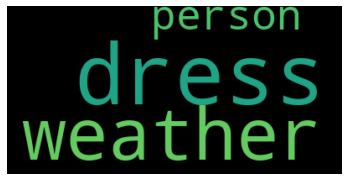

Topic 1


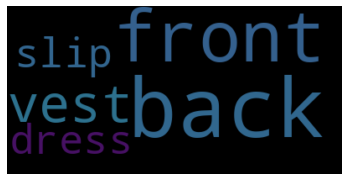

Topic 2


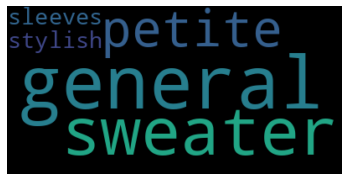

Topic 3


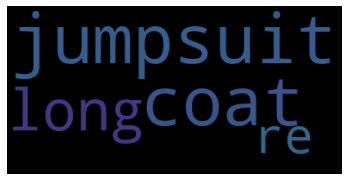

Topic 4


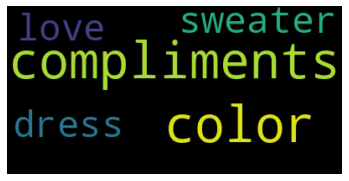

Topic 5


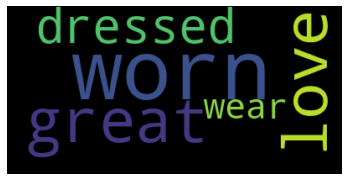

Topic 6


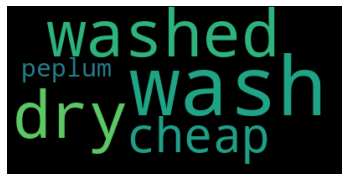

Topic 7


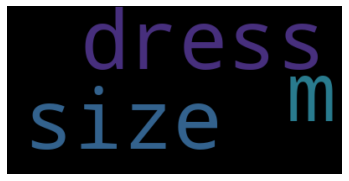

Topic 8


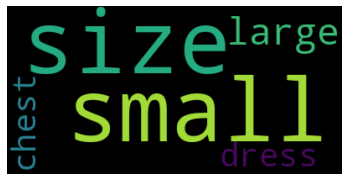

Topic 9


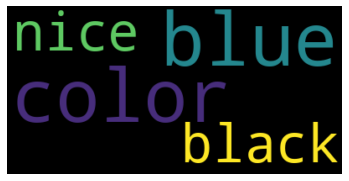

In [ ]:
# Now to print our topics:
topicIndices = lda_model.describeTopics(maxTermsPerTopic = 5)
vocabList = cvmodel.vocabulary

# we print the final topics
for topic in topicIndices.collect():
    print("Topic ID:" + str(topic["topic"]))
    for term in topic["termIndices"]:
        print(vocabList[term])
    print("------------------")


# AND Create a word cloud plot
# Convert the indices to words
from wordcloud import WordCloud
from matplotlib import pyplot as plt

word_topic = topicIndices.rdd.map(lambda row: [vocabList[i] for i in row.termIndices]).collect()

# Generate the word cloud for each topic
for i in range(len(word_topic)):
    print("Topic {}".format(i))
    wordcloud = WordCloud().generate(" ".join(word_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()